# Linear Regression

Tudor Berariu, Andrei Nica, 2018

In [0]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## The dataset

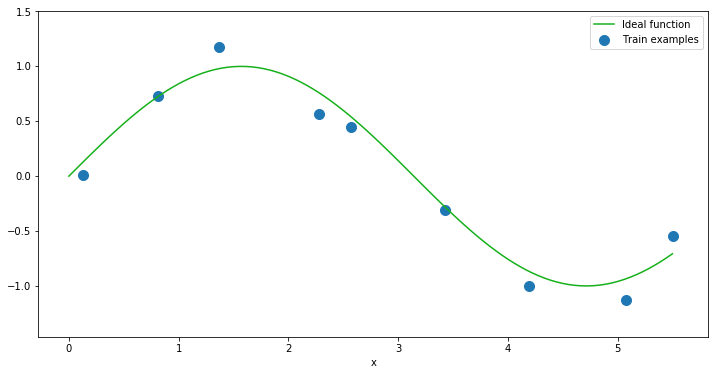

In [0]:
def generate_examples(N:int = 9, noise:float = 0.2, dist_noise:float = 0.2):
    X = np.linspace(0, 1.75 * np.pi, N)
    X += np.random.randn(N) * dist_noise
    T = np.sin(X) + np.random.randn(N) * noise
    return X, T

N_train = 9
N_test = 50
noise = 0.2

X_train, T_train = generate_examples(N=N_train, noise=noise)
X_test, T_test = generate_examples(N=N_test, noise=noise)
X_real, T_real = generate_examples(100, .0, .0)

plt.figure(figsize=(12,6)); plt.axis('equal')
plt.plot(X_real, T_real, sns.xkcd_rgb["green"], label="Ideal function")
plt.scatter(X_train, T_train, s=100, label="Train examples")
# plt.scatter(X_test, T_test, s=10, label="Test examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

## Extracting features
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$

In [0]:
def extract_features(X: np.array, M: int):
    raise NotImplementedError

## Closed-form solution

We search for $${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf w}^{\text{T}}{\bf \phi}^{(n)} - t^{(n)}\right)^2$$

In [0]:
def mean_squared_error(Y, T):
    raise NotImplementedError

In [0]:
def train_params(X, T, M):
    raise NotImplementedError

In [0]:
def predict(X, W, M):
    raise NotImplementedError

## Visualise learned predictor

In [0]:
M = 9

# Train
W = train_params(X_train, T_train, M)

# Compute mean squared error
Y_train = predict(X_train, W, M)
Y_test = predict(X_test, W, M)
print("Train error:", mean_squared_error(Y_train, T_train))
print("Test  error:", mean_squared_error(Y_test, T_test))

# Plot
Y_real = predict(X_real, W, M)

plt.figure(figsize=(12,6)); plt.axis('equal'); plt.ylim(-3, 3)
plt.plot(X_real, T_real, sns.xkcd_rgb["green"], label="Ideal function")
plt.plot(X_real, Y_real, sns.xkcd_rgb["red"], label="Learned function")
plt.scatter(X_train, T_train, s=100, label="Train examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

## Evaluate predictor

In [0]:
train_mse = []
test_mse = []
for M in range(10):
    W = train_params(X_train, T_train, M)
    Y_train = predict(X_train, W, M)
    Y_test = predict(X_test, W, M)
    train_mse.append(mean_squared_error(Y_train, T_train))
    test_mse.append(mean_squared_error(Y_test, T_test))

plt.figure(figsize=(12,8))
plt.plot(range(10), train_mse, sns.xkcd_rgb["green"], label="Train MSE")
plt.plot(range(10), test_mse, sns.xkcd_rgb["red"], label="Test MSE")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()